In [4]:
import pandas as pd

### 1. Load the dataset into python 

In [11]:
data = pd.read_csv(r"C:\Users\aswin v manoharan\Downloads\titanic_dataset.csv")


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId', inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
data.fillna(data.mean(), inplace=True)

C:\Users\aswin v manoharan\AppData\Local\Temp\ipykernel_4324\1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [9]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 5. Check and handle outliers in at least 3 columns in the dataset


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

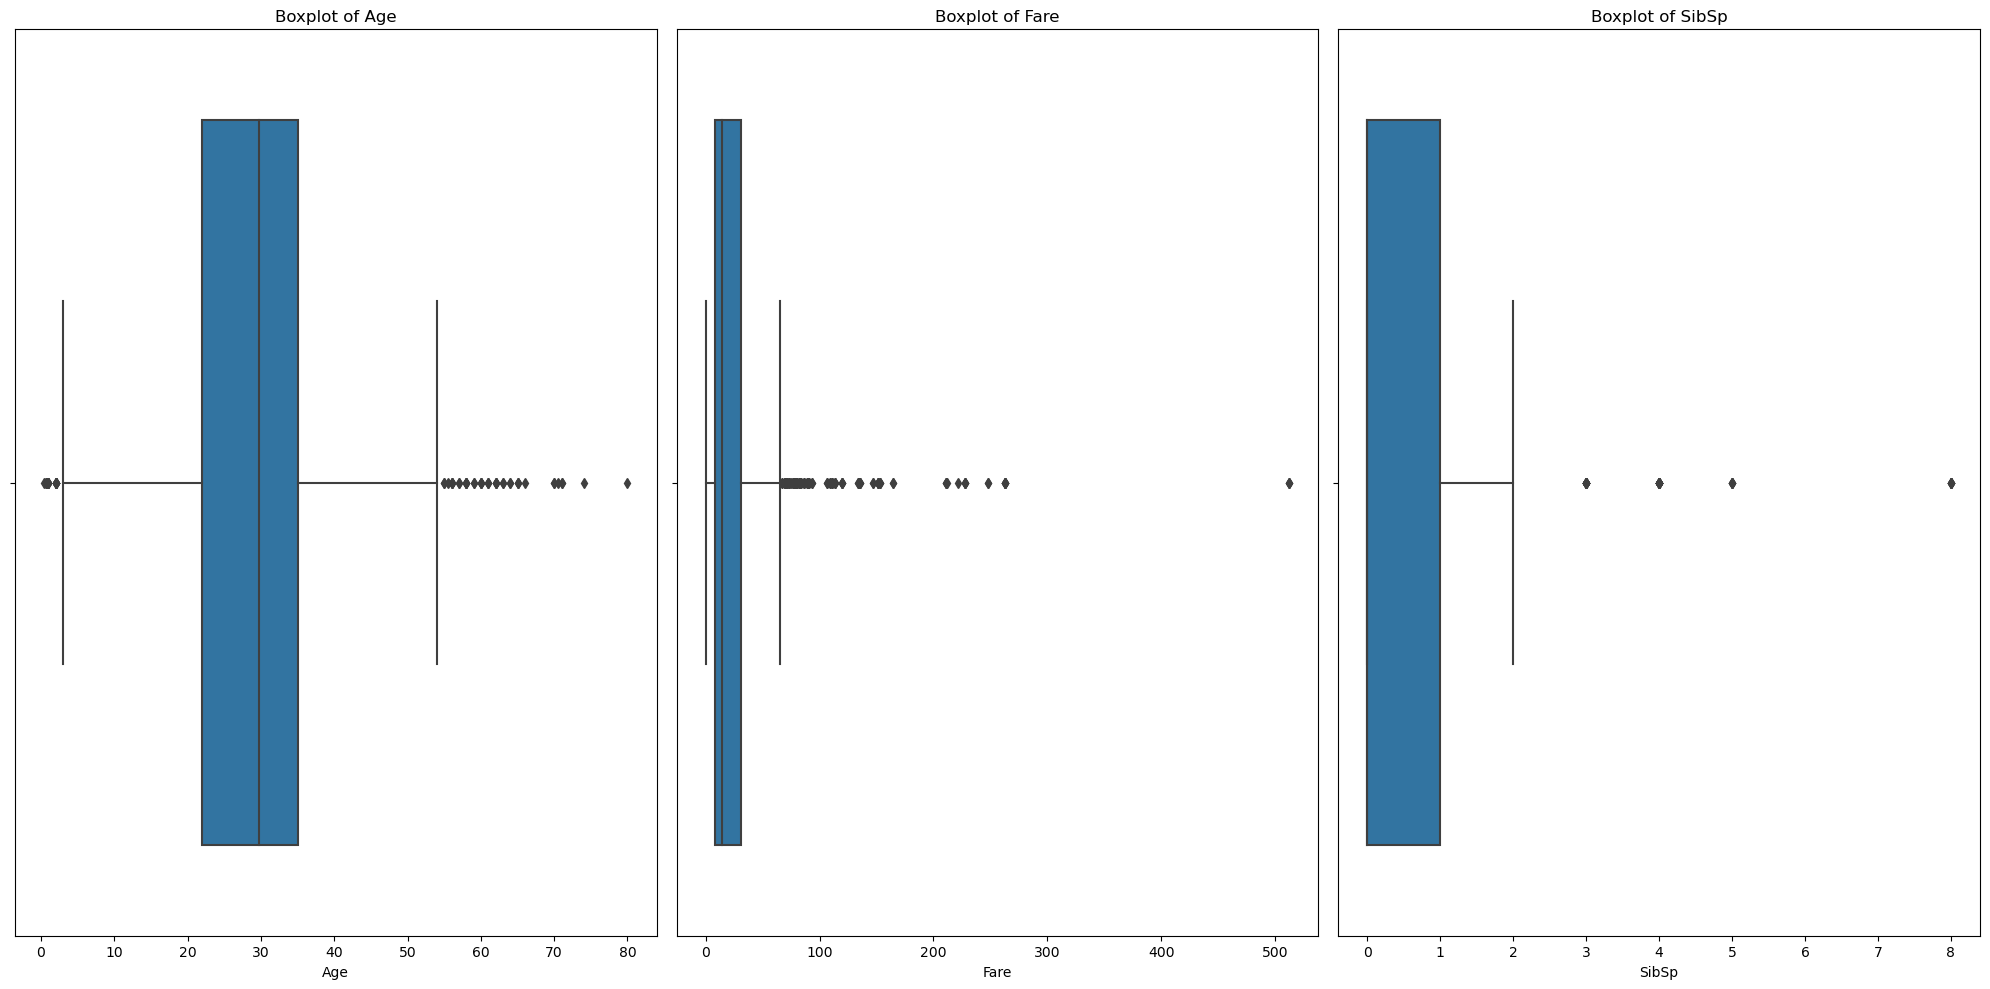

In [13]:
outlier_columns = ['Age','Fare','SibSp']
plt.figure(figsize=(20,10))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [14]:
def handle_outliers(column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])



In [15]:
for column in outlier_columns: 
    handle_outliers(column)


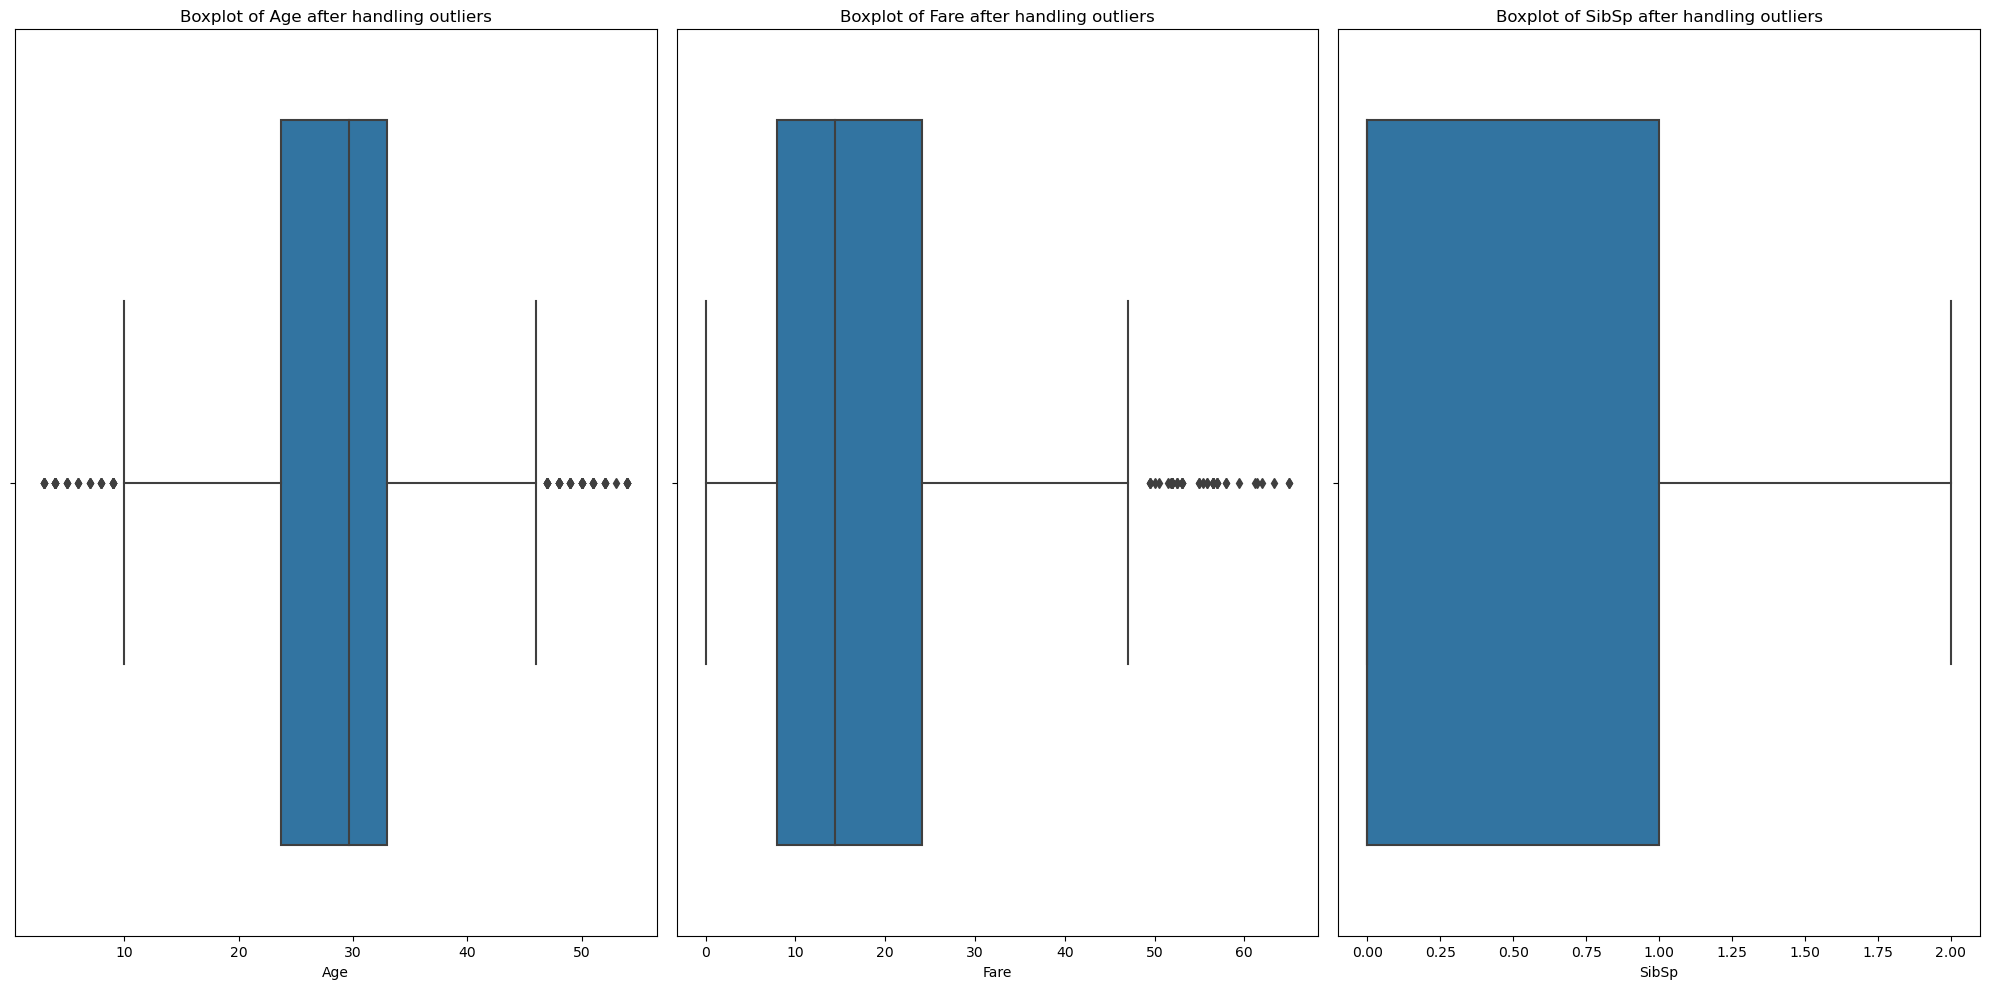

In [16]:
plt.figure(figsize=(20,10))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column} after handling outliers')
plt.tight_layout()
plt.show()

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
X = data.drop('Survived', axis=1) 
y = data['Survived']

In [22]:
scaler = MinMaxScaler()

In [23]:
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'